# Neural Network with TensorFlow
In this notebook, we will build a neural network using TensorFlow and a dataset other than MNIST and CIFAR. Specifically, we will use the `Fashion MNIST` dataset, which is a popular benchmark dataset for image classification tasks.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


## Load and Preprocess the Data
The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. Each image is 28x28 pixels.

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Build the Neural Network Model
We use a simple feedforward neural network architecture with one hidden layer.

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input images
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model
Train the neural network for 5 epochs and validate it on the test data.

In [4]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7776 - loss: 0.6426 - val_accuracy: 0.8403 - val_loss: 0.4469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8659 - loss: 0.3716 - val_accuracy: 0.8655 - val_loss: 0.3739
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8778 - loss: 0.3367 - val_accuracy: 0.8599 - val_loss: 0.3900
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8846 - loss: 0.3108 - val_accuracy: 0.8660 - val_loss: 0.3672
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8895 - loss: 0.2922 - val_accuracy: 0.8779 - val_loss: 0.3453
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8993 - loss: 0.2716 - val_accuracy: 0.8771 - val_loss: 0.3403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9010 - loss: 0.2644 - val_accuracy: 0.8709 - val_loss: 0.3593
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2558 - 

## Evaluate the Model
Evaluate the trained model's performance on the test dataset.

313/313 - 1s - 2ms/step - accuracy: 0.8808 - loss: 0.3310
Test Accuracy: 0.8808000087738037
Test Loss: 0.3309648931026459


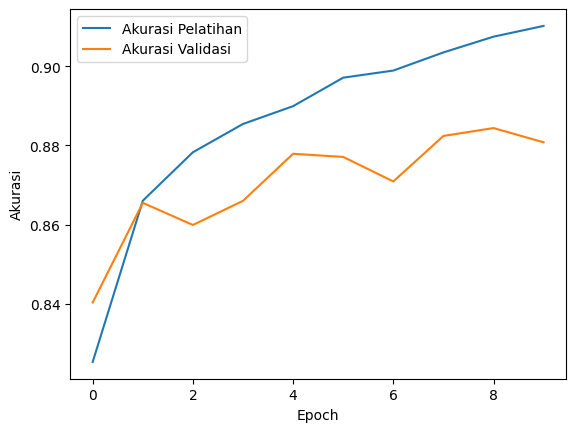

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

## Save the Model
Save the trained model for future use.

In [6]:
model.save("fashion_mnist_nn_model.h5")

## Summary
In this notebook, we:
1. Loaded and preprocessed the Fashion MNIST dataset.
2. Built a neural network model using TensorFlow.
3. Trained and evaluated the model.
4. Saved the trained model for future use.